In [25]:
%%capture
!pip install --upgrade sklearn
!pip install Arabic-Stopwords
!pip install emoji
!pip install Tashaphyne
!pip install qalsadi
!pip install langdetect
!pip install --upgrade scikit-learn
!pip install nltk
!pip install pandas
!pip install seaborn
!pip install wordcloud
!pip install arabic_reshaper
!pip install python-bidi
!pip install transformers
!pip install tensorflow
!pip install tf-keras
!pip install scipy

# **Importing Libraries**

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [27]:
# Load your Arabic and Turkish datasets
# Replace 'arabic_data.csv' and 'turkish_data.csv' with the paths to your datasets
arabic_df = pd.read_csv('CompanyReviews.csv')
turkish_df = pd.read_csv('TurkishReviews.csv')

# Changing the Turkish comments' colmumn name as the Arabic comments column' name
turkish_df = turkish_df.rename(columns={'Yorum': 'review_description', 'Duygu': 'rating'})

# Add a new column to each dataset to identify the language
arabic_df['language'] = 'Arabic'
turkish_df['language'] = 'Turkish'

# Concatenate the two datasets
df = pd.concat([arabic_df, turkish_df])

df

Unnamed: 0                                 review_description   rating  \
0           0.0                                               ÿ±ÿßÿ¶ÿπ        1   
1           1.0  ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿ®ÿ¥ŸÉ...        1   
2           2.0  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...       -1   
3           3.0                 ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤ÿü       -1   
4           4.0  ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÉŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇŸá ŸÖÿπ ÿßŸÜŸáÿß ÿ®ÿ™ŸÉŸà...       -1   
..          ...                                                ...      ...   
308         NaN  Urun berbat ilk yikamada mahvoldu aldigima pis...  Olumsuz   
309         NaN  Resimdeki gibi hic canli degil  sert bi kumasa...  Olumsuz   
310         NaN  Bir yildiz bile cok bu urun icin internetten a...  Olumsuz   
311         NaN  URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU. ...  Olumsuz   
312         NaN                Sert ve kalitesiz sofra bezi gibi    Olumsuz   

    company language  
0    talbat   Arabic  
1    talbat   Arabic  
2    talbat   Arabic  
3    talbat   Arabic  
4    talbat   Arabic  
..      ...      ...  
308     NaN  Turkish  
309     NaN  Turkish  
310     NaN  Turkish  
311     NaN  Turkish  
312     NaN  Turkish  

[40359 rows x 5 columns]

# **Data Cleaning**

In [28]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)

# Replace the rating values
df['rating'] = df['rating'].replace({1: 'positive', -1: 'negative', 0: 'neutral', 'Olumlu': 'positive' , 'Olumsuz': 'negative', 'Tarafsiz': 'neutral'})
df

review_description    rating company  \
0                                                 ÿ±ÿßÿ¶ÿπ  positive  talbat   
1    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿ®ÿ¥ŸÉ...  positive  talbat   
2    ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...  negative  talbat   
3                   ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤ÿü  negative  talbat   
4    ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÉŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇŸá ŸÖÿπ ÿßŸÜŸáÿß ÿ®ÿ™ŸÉŸà...  negative  talbat   
..                                                 ...       ...     ...   
308  Urun berbat ilk yikamada mahvoldu aldigima pis...  negative     NaN   
309  Resimdeki gibi hic canli degil  sert bi kumasa...  negative     NaN   
310  Bir yildiz bile cok bu urun icin internetten a...  negative     NaN   
311  URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU. ...  negative     NaN   
312                Sert ve kalitesiz sofra bezi gibi    negative     NaN   

    language  
0     Arabic  
1     Arabic  
2     Arabic  
3     Arabic  
4     Arabic  
..       ...  
308  Turkish  
309  Turkish  
310  Turkish  
311  Turkish  
312  Turkish  

[40359 rows x 4 columns]

In [29]:
# Replace NaN values in 'company' column with 'n/a'
df['company'] = df['company'].fillna('n/a')

In [30]:
#display the counts of each category
df['rating'].value_counts()

rating
positive                                                                                                       24080
negative                                                                                                       14322
neutral                                                                                                         1953
3 gun gidiyor. Olumsuz taraflari : Videolari .mov formatinda kaydediyor dolayisiyla boyutlari buyuk oluyor.        1
A                                                                                                                  1
200 olcusu tam                                                                                                     1
Name: count, dtype: int64

In [31]:
# Define the valid ratings
valid_ratings = ['negative', 'positive', 'neutral']

# Keep only the rows in your DataFrame where the 'rating' column is in valid_ratings
df = df[df['rating'].isin(valid_ratings)]

#display the counts of each category
df['rating'].value_counts()

rating
positive    24080
negative    14322
neutral      1953
Name: count, dtype: int64

In [32]:
# Group the DataFrame 'df' by the 'company' column and calculate the size of each group
# This will return a Series with the number of occurrences for each unique 'company' value
df.groupby('company').size()

company
Ezz Steel           49
Raya               268
TMG                250
capiter             73
domty                4
elsewedy           147
hilton             100
n/a                309
nestle              18
swvl              4693
talbat           32073
telecom_egypt     2090
venus              281
dtype: int64

In [33]:
# display the sum of null values in each column
df.isnull().sum()

review_description    2
rating                0
company               0
language              0
dtype: int64

In [34]:
# dropping rows that has null values in review_description column
df = df.dropna(subset=['review_description'])
df.isnull().sum()

review_description    0
rating                0
company               0
language              0
dtype: int64

In [35]:
# display the sum of duplicates in reviews
df.review_description.duplicated().sum()

1046

In [36]:
# deleting rows that has the same reviews
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)
df.review_description.duplicated().sum()

0

In [37]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)
df

review_description    rating company  \
0                                                   ÿ±ÿßÿ¶ÿπ  positive  talbat   
1      ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿ®ÿ¥ŸÉ...  positive  talbat   
2      ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...  negative  talbat   
3                     ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤ÿü  negative  talbat   
4      ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÉŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇŸá ŸÖÿπ ÿßŸÜŸáÿß ÿ®ÿ™ŸÉŸà...  negative  talbat   
...                                                  ...       ...     ...   
39302  Urun berbat ilk yikamada mahvoldu aldigima pis...  negative     n/a   
39303  Resimdeki gibi hic canli degil  sert bi kumasa...  negative     n/a   
39304  Bir yildiz bile cok bu urun icin internetten a...  negative     n/a   
39305  URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU. ...  negative     n/a   
39306                Sert ve kalitesiz sofra bezi gibi    negative     n/a   

      language  
0       Arabic  
1       Arabic  
2       Arabic  
3       Arabic  
4       Arabic  
...        ...  
39302  Turkish  
39303  Turkish  
39304  Turkish  
39305  Turkish  
39306  Turkish  

[39307 rows x 4 columns]

## **Visualization**

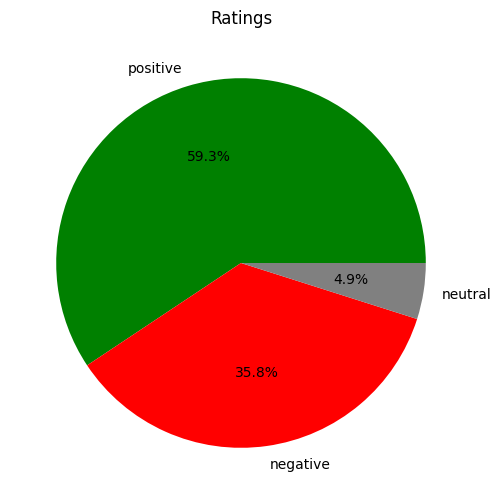

In [38]:
# Count the number of occurrences of each rating
rating_counts = df['rating'].value_counts()

# Define a color for each rating
colors = ['green' if label == 'positive'
          else 'red' if label == 'negative'
          else 'gray'
          for label in rating_counts.index]

# Create the pie chart
plt.figure(figsize=(10,6))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Ratings')
plt.show()

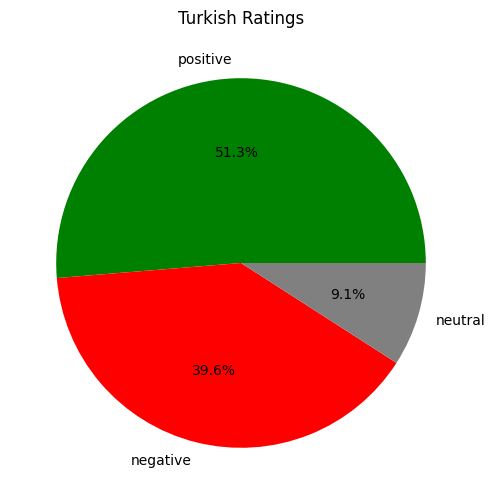

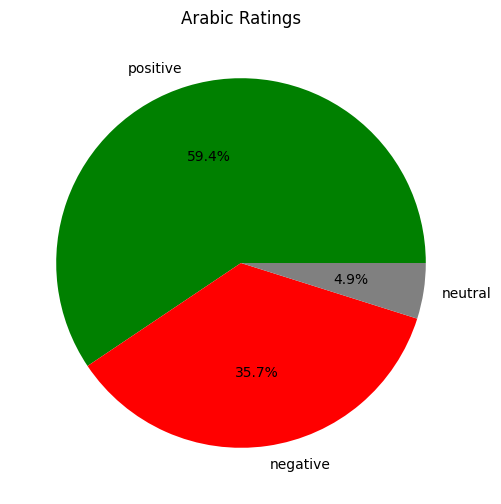

In [39]:
# Assuming 'language' is the name of the column with language labels
# and 'rating' is the name of the column with rating labels

# Filter the DataFrame for Turkish language reviews and count the ratings
turkish_ratings = df[df['language'] == 'Turkish']['rating'].value_counts()

# Define a color for each Turkish rating
turkish_colors = ['green' if label == 'positive'
                  else 'red' if label == 'negative'
                  else 'gray'
                  for label in turkish_ratings.index]

# Create the pie chart for Turkish ratings
plt.figure(figsize=(10,6))
plt.pie(turkish_ratings, labels = turkish_ratings.index, autopct='%1.1f%%', colors=turkish_colors)
plt.title('Turkish Ratings')
plt.show()

# Filter the DataFrame for Arabic language reviews and count the ratings
arabic_ratings = df[df['language'] == 'Arabic']['rating'].value_counts()

# Define a color for each Arabic rating
arabic_colors = ['green' if label == 'positive'
                 else 'red' if label == 'negative'
                 else 'gray'
                 for label in arabic_ratings.index]

# Create the pie chart for Arabic ratings
plt.figure(figsize=(10,6))
plt.pie(arabic_ratings, labels = arabic_ratings.index, autopct='%1.1f%%', colors=arabic_colors)
plt.title('Arabic Ratings')
plt.show()


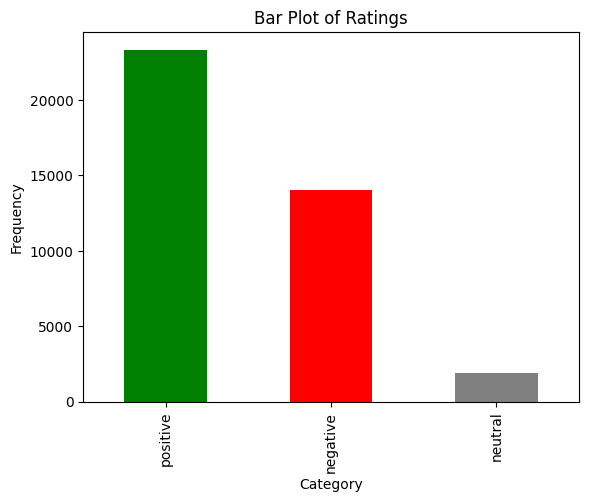

In [40]:
# Get the value counts
rating_counts = df['rating'].value_counts()

# Define a color for each rating
colors = ['green' if label == 'positive'
          else 'red' if label == 'negative'
          else 'gray'
          for label in rating_counts.index]

# Create the bar plot
rating_counts.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot of Ratings')
plt.show()


In [41]:
df.company.unique()

array(['talbat', 'swvl', 'venus', 'Raya', 'telecom_egypt', 'hilton',
       'domty', 'nestle', 'elsewedy', 'capiter', 'TMG', 'Ezz Steel',
       'n/a'], dtype=object)

# **Data Preprocessing**

In [42]:
df.review_description=df.review_description.astype(str)
df.review_description=df.review_description.apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,ÿå-./:;<=>ÿü?@[\]^_`{|}~"""), ' ', x))
df.review_description=df.review_description.apply(lambda x:x.replace('ÿõ',"", ))
df

review_description    rating company  \
0                                                   ÿ±ÿßÿ¶ÿπ  positive  talbat   
1      ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿπŸÑŸâ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿ®ÿ¥ŸÉ...  positive  talbat   
2      ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...  negative  talbat   
3                     ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖŸÜ ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤   negative  talbat   
4      ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÉŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿà ŸÖÿ∫ŸÑŸÇŸá ŸÖÿπ ÿßŸÜŸáÿß ÿ®ÿ™ŸÉŸà...  negative  talbat   
...                                                  ...       ...     ...   
39302  Urun berbat ilk yikamada mahvoldu aldigima pis...  negative     n/a   
39303  Resimdeki gibi hic canli degil  sert bi kumasa...  negative     n/a   
39304  Bir yildiz bile cok bu urun icin internetten a...  negative     n/a   
39305  URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU  ...  negative     n/a   
39306                Sert ve kalitesiz sofra bezi gibi    negative     n/a   

      language  
0       Arabic  
1       Arabic  
2       Arabic  
3       Arabic  
4       Arabic  
...        ...  
39302  Turkish  
39303  Turkish  
39304  Turkish  
39305  Turkish  
39306  Turkish  

[39307 rows x 4 columns]

In [43]:
# Load the stop words with the correct encoding
with open('arabic.txt', 'r', encoding='utf-8') as f:
    arabic_stopwords = f.read().splitlines()

with open('turkish.txt', 'r', encoding='utf-8') as f:
    turkish_stopwords = f.read().splitlines()

#Some words needed to work with to will remove
for word in ['ŸÑÿß','ŸÑŸÉŸÜ']:
    arabic_stopwords.remove(word)

# Combine the stop words into one list
all_stopwords = arabic_stopwords + turkish_stopwords

In [44]:
df.review_description = df.review_description.apply(lambda x:" ".join([word for word in x.split() if word not in all_stopwords]))

df

review_description    rating company  \
0                                                   ÿ±ÿßÿ¶ÿπ  positive  talbat   
1            ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß Ÿäÿ≥ÿßÿπÿØ ÿ™ŸÑÿ®ŸäŸá ÿßŸÑÿßÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿßÿ≥ÿ±ÿπ  positive  talbat   
2      ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖÿß ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ®ÿß...  negative  talbat   
3                         ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿ∑ŸÑÿ® ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤  negative  talbat   
4      ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ŸÖÿ∫ŸÑŸÇŸá ÿ®ÿ™ŸÉŸàŸÜ ŸÅÿßÿ™ÿ≠Ÿá ÿ®ŸÇÿßŸÑŸá...  negative  talbat   
...                                                  ...       ...     ...   
39302  Urun berbat ilk yikamada mahvoldu aldigima pis...  negative     n/a   
39303  Resimdeki hic canli degil sert bi kumasa sahip...  negative     n/a   
39304  Bir yildiz bile cok urun icin internetten aldi...  negative     n/a   
39305  URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU F...  negative     n/a   
39306                          Sert kalitesiz sofra bezi  negative     n/a   

      language  
0       Arabic  
1       Arabic  
2       Arabic  
3       Arabic  
4       Arabic  
...        ...  
39302  Turkish  
39303  Turkish  
39304  Turkish  
39305  Turkish  
39306  Turkish  

[39307 rows x 4 columns]

In [45]:
# Handling Emojis in reviews
arabic_emojis = {
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "üòÇ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üíî":"ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ",
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"Ÿäÿ®ŸÉŸä",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸäŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸäŸÜ",
    "üòä":"ÿ≥ÿπÿßÿØÿ©",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸäŸÜÿßŸÖ",
    "üòÄ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸäŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸäŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíò":"ÿ≠ÿ®",
    "‚ò∫":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úåÔ∏è":"ŸÖÿ±ÿ≠",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÉÿßÿ±ÿ´ÿ©",
    "üòÅ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üíÉüèº":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üíé":"ÿßŸÑŸÖÿßÿ∏",
    "üò∑":"Ÿàÿ®ÿßÿ° ŸÖÿ±ÿ∂",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ÿ®ÿ±ÿßŸÅŸà",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿßÿ∂ÿ®",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "üôèüèº":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòö":"ÿ≠ÿ®",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",
    "üò¨":"ÿπÿØŸÖ ÿßŸÑÿ±ÿßÿ≠ÿ©",
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",
    "‚ò†Ô∏è":"Ÿàÿ¨Ÿá ŸÖÿ±ÿπÿ®",
    "üéâ":"ŸäŸáŸÜÿ¶",
    "üòø":"Ÿàÿ¨Ÿá ÿ≠ÿ≤ŸäŸÜ",
    "‚òπÔ∏è":"Ÿàÿ¨Ÿá Ÿäÿßÿ¶ÿ≥",
    "üòò" :"ÿ≠ÿ®",
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",
    "üíã":  "ÿ®Ÿàÿ≥Ÿá",
    "‚ù£Ô∏è":"ÿ≠ÿ®",
    "üòá":"ÿØÿßŸäÿÆ",
    "üòà":"ÿ±ÿπÿ®",
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",
    "üòª":"ÿßÿπÿ¨ÿßÿ®",
    "üí™üèΩ":"ŸÇŸàŸá",
    "üò§":"Ÿàÿ¨Ÿá ÿπÿßÿ®ÿ≥",
    "üòπ":"ÿ∂ÿ≠ŸÉ",
    "üíì":"ÿ≠ÿ®",
    "üëª":"ÿ±ÿπÿ®",
    "‚ùé":"ÿÆÿ∑ÿ°",
    "ü§Æ":"ÿ≠ÿ≤ŸÜ",
    }

turkish_emojis = {
    "üôÇ": "G√ºl√ºmseme",
    "üòÇ": "Kahkaha",
    "üíî": "Kƒ±rƒ±k Kalp",
    "‚ù§Ô∏è": "A≈ük",
    "üòç": "A≈üƒ±k Olmu≈ü",
    "üò≠": "Aƒülama",
    "üò¢": "√úzg√ºn",
    "üòî": "D√º≈ü√ºnceli",
    "‚ô•": "A≈ük",
    "üíú": "A≈ük",
    "üòÖ": "Terli G√ºl√ºmseme",
    "üôÅ": "√úzg√ºn",
    "üíï": "A≈ük",
    "üíô": "A≈ük",
    "üòû": "√úzg√ºn",
    "üòä": "Mutluluk",
    "üëè": "Alkƒ±≈ü",
    "üëå": "M√ºkemmel",
    "üò¥": "Uyku",
    "üòÄ": "Kahkaha",
    "üòå": "Rahatlamƒ±≈ü",
    "üåπ": "G√ºl",
    "üôà": "Utanga√ß",
    "üòÑ": "Kahkaha",
    "üòê": "N√∂tr",
    "‚úå": "Zafer",
    "‚ú®": "Parƒ±ltƒ±",
    "ü§î": "D√º≈ü√ºnce",
    "üòè": "K√ºstah",
    "üòí": "Rahatsƒ±z",
    "üôÑ": "Sƒ±kƒ±lmƒ±≈ü",
    "üòï": "Hayal Kƒ±rƒ±klƒ±ƒüƒ±",
    "üòÉ": "Kahkaha",
    "üå∏": "√ái√ßek",
    "üòì": "√úzg√ºn",
    "üíû": "A≈ük",
    "üíó": "A≈ük",
    "üòë": "Rahatsƒ±z",
    "üòé": "Havalƒ±",
    "üíõ": "A≈ük",
    "üò©": "Yorgun",
    "üí™": "G√º√ß",
    "üëç": "Onay",
    "üôèüèª": "Dua",
    "üò≥": "≈ûa≈ükƒ±n",
    "üëèüèº": "Alkƒ±≈ü",
    "üåö": "Gizemli",
    "üíö": "A≈ük",
    "üôè": "Dua",
    "üíò": "A≈ük",
    "‚ò∫": "G√ºl√ºmseme",
    "üò∂": "≈ûa≈ükƒ±n",
    "‚úåÔ∏è": "Eƒülence",
    "‚úãüèª": "Dur",
    "üòâ": "G√∂z Kƒ±rpma",
    "üå∑": "√ái√ßek",
    "üôÉ": "Ters G√ºl√ºmseme",
    "üò´": "Yorgun",
    "üò®": "Korkmu≈ü",
    "üíü": "A≈ük",
    "üò™": "Uykulu",
    "üòÜ": "Kahkaha",
    "üò£": "√úzg√ºn",
    "‚ò∫Ô∏è": "G√ºl√ºmseme",
    "üò±": "Panik",
    "üòÅ": "Kahkaha",
    "üòñ": "Rahatsƒ±z",
    "üèÉüèº": "Ko≈üu",
    "üò°": "√ñfkeli",
    "üö∂": "Y√ºr√ºme",
    "ü§ï": "Yaralƒ±",
    "‚ÄºÔ∏è": "√únlem",
    "üëåüèª": "M√ºkemmel",
    "‚ù£": "A≈ük",
    "üôä": "Sessiz",
    "üíÉ": "Dans",
    "üíÉüèº": "Dans",
    "üòú": "≈ûakacƒ±",
    "üëä": "Yumruk",
    "üòü": "Endi≈üeli",
    "üíñ": "A≈ük",
    "üò•": "√úzg√ºn",
    "üíé": "Elmas",
    "üò∑": "Hasta",
    "‚ö†Ô∏è": "Uyarƒ±",
    "ü§ó": "Sarƒ±lmak",
    "‚úñÔ∏è": "Yanlƒ±≈ü",
    "üëë": "Ta√ß",
    "‚úîÔ∏è": "Doƒüru",
    "üíå": "Mektup",
    "üò≤": "≈ûa≈ükƒ±n",
    "üö´": "Yasak",
    "üëèüèª": "Alkƒ±≈ü",
    "üëçüèª": "Onay",
    "‚úåüèº": "Zafer ƒ∞≈üareti",
    "üåù": "G√ºl√ºmseme",
    "üòß": "Endi≈üeli",
    "‚ùóÔ∏è": "√únlem",
    "üëêüèΩ": "A√ßƒ±k Eller",
    "üëåüèΩ": "Tamam",
    "‚ÅâÔ∏è": "Soru √únlem",
    "üéÄ": "Kurdele",
    "üíµ": "Para",
    "üòã": "Lezzetli",
    "üòõ": "Dil √áƒ±karma",
    "üò†": "Kƒ±zgƒ±n",
    "‚ùå": "Yanlƒ±≈ü",
    "üëåüèº": "M√ºkemmel",
    "üòÆ": "≈ûa≈ükƒ±n",
    "üò¶": "Endi≈üeli",
    "üê§": "Ku≈ü",
    "üí´": "Ba≈ü D√∂nmesi",
    "üíù": "Hediye Kalbi",
    "‚ù§Ô∏é": "A≈ük",
    "üôèüèº": "Dua",
    "‚Äº": "√únlem",
    "‚ô•Ô∏è": "A≈ük",
    "üí©": "Bok",
    "üåü": "Yƒ±ldƒ±z",
    "üëäüèº": "Yumruk",
    "üòö": "√ñp√ºc√ºk",
    "üëéüèª": "Beƒüenmeme",
    "üëäüèΩ": "Yumruk",
    "üòô": "√ñp√ºc√ºk",
    "üëèüèΩ": "Alkƒ±≈ü",
    "üí™üèª": "G√º√ß",
    "üî•": "Ate≈ü",
    "üò¨": "Sƒ±kƒ±ntƒ±",
    "üëäüèø": "Yumruk",
    "‚úãüèº": "El",
    "‚ò†Ô∏è": "Kafatasƒ±",
    "üéâ": "Kutlama",
    "üòø": "Aƒülayan Kedi",
    "‚òπÔ∏è": "√úzg√ºn Y√ºz",
    "üòò": "√ñp√ºc√ºk",
    "üò∞": "Endi≈üeli",
    "üåº": "√ái√ßek",
    "üíã": "√ñp√ºc√ºk",
    "‚ù£Ô∏è": "A≈ük",
    "üòá": "Masum",
    "üòà": "≈ûeytan",
    "üëé": "Beƒüenmeme",
    "üòØ": "≈ûa≈ükƒ±n",
    "üòª": "Kalp G√∂zl√º Kedi",
    "üí™üèΩ": "G√º√ß",
    "üò§": "Buƒüulu Nefes",
    "üòπ": "G√ºlen Kedi",
    "üíì": "Kalp Atƒ±≈üƒ±",
    "üëª": "Hayalet",
    "‚ùé": "Yanlƒ±≈ü",
    "ü§Æ": "Kusma",
}


emotions_to_emoji = {
    ":)" : "üôÇ",
    ":(" : "üôÅ",
    "xD" : "üòÜ",
    ":=(": "üò≠",
    ":'(": "üò¢",
    ":'‚Äë(": "üò¢",
    "XD" : "üòÇ",
    ":D" : "üôÇ",
    "‚ô¨" : "üéµ",
    "‚ô°" : "‚ù§Ô∏è",
    "‚òª"  : "üôÇ",
}


In [46]:
from langdetect import detect, LangDetectException
import emoji

def emoticons_to_emoji(text):
    for emoticon, emoji in emotions_to_emoji.items():
        text = text.replace(emoticon, emoji)
    return text

def checkemojie(text, lang):
    emojistext=[]
    for char in text:
        if any(emoji.distinct_emoji_list(char)):
            if lang == 'ar':
                if char in arabic_emojis.keys():
                    emojistext.append(arabic_emojis[emoji.distinct_emoji_list(char)[0]])
            else:
                if char in turkish_emojis.keys():
                    emojistext.append(turkish_emojis[emoji.distinct_emoji_list(char)[0]])
    return " ".join(emojistext)

def emojiTextTransform(text):
    text = emoticons_to_emoji(text)  # Transform emoticons to emojis
    cleantext = re.sub(r'[^\w\s]', '', text)
    try:
        lang = detect(cleantext)  # Detect the language of the text
    except LangDetectException:
        lang = 'unknown'
    return cleantext + " " + checkemojie(text, lang)




emojiTextTransform(df.review_description[71])

'ÿ¨ÿ≠ŸáŸÜŸÜÿßÿ∫ŸÜŸÖÿ¨ÿ∏ ÿ¨ÿ≠ÿÆÿ™ÿßŸâÿ©ÿ≤ŸàŸÜŸá ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ'

In [47]:
emojiTextTransform(df.review_description[38999])

'Urun sorunsuz elime ulasti Is yerim icin aldim cok memnunum  Kahkaha'

In [48]:
df.review_description=df.review_description.apply(lambda x:emojiTextTransform(x))
df.review_description[71]

'ÿ¨ÿ≠ŸáŸÜŸÜÿßÿ∫ŸÜŸÖÿ¨ÿ∏ ÿ¨ÿ≠ÿÆÿ™ÿßŸâÿ©ÿ≤ŸàŸÜŸá ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ ÿ¨ÿßÿ¶ÿπ'

In [49]:
df.review_description.duplicated().sum()

1149

In [50]:
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [51]:
# remove digits
df.review_description=df.review_description.apply(lambda x:''.join([word for word in x if not word.isdigit()]))

In [52]:
#applying lemmatizer
import qalsadi.lemmatizer
lemmer = qalsadi.lemmatizer.Lemmatizer()

In [53]:
df.review_description=df.review_description.apply(lambda x:lemmer.lemmatize_text(x))
df

review_description    rating company  \
0                                                 [ÿ±ÿßÿ¶ÿπ]  positive  talbat   
1            [ÿ®ÿ±ŸÜÿßŸÖÿ¨, ÿ±ÿßÿ¶ÿπ, ÿ¨ÿØÿß, ÿ≥ÿßÿπÿØ, ÿ£ŸÑÿ®, ÿßÿ≠ÿ™Ÿäÿßÿ¨, ÿ≥ÿ±ÿπ]  positive  talbat   
2      [ÿ™ÿ∑ÿ®ŸäŸÇ, ŸÑÿß, Ÿäÿ∫ÿ™ÿ≠, ÿØÿßÿ¶ŸÖ, ÿ®Ÿäÿπÿ∑ŸäŸÜŸä, ŸÑÿß, ÿ£Ÿàÿ¨ÿØ, ÿßÿ™ÿµ...  negative  talbat   
3                     [ŸÑŸÖÿßÿ∞ÿß, ŸÑÿß, ÿ£ŸÖŸÉŸÜ, ÿ∑ŸÑÿ®, ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤]  negative  talbat   
4      [ÿ®ÿ±ŸÜÿßŸÖÿ¨, ÿ®Ÿäÿ∏Ÿáÿ±, ŸÖÿ∑ÿßÿπŸÖ, ŸÖÿ∫ŸÑŸÇ, ÿ™ŸÉŸàŸÜ, ŸÅÿßÿ™ÿ≠, ÿ®ŸÇÿßŸÑ,...  negative  talbat   
...                                                  ...       ...     ...   
39302  [Urun, berbat, ilk, yikamada, mahvoldu, aldigi...  negative     n/a   
39303  [Resimdeki, hic, canli, degil, sert, bi, kumas...  negative     n/a   
39304  [Bir, yildiz, bile, cok, urun, icin, internett...  negative     n/a   
39305  [URUN, KULLANMADAN, EVVEL, KI, ILK, YIKAMADA, ...  negative     n/a   
39306                     [Sert, kalitesiz, sofra, bezi]  negative     n/a   

      language  
0       Arabic  
1       Arabic  
2       Arabic  
3       Arabic  
4       Arabic  
...        ...  
39302  Turkish  
39303  Turkish  
39304  Turkish  
39305  Turkish  
39306  Turkish  

[38158 rows x 4 columns]

In [54]:
df.review_description=df.review_description.apply(lambda x:" ".join(x))
df

review_description    rating company  \
0                                                   ÿ±ÿßÿ¶ÿπ  positive  talbat   
1                    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß ÿ≥ÿßÿπÿØ ÿ£ŸÑÿ® ÿßÿ≠ÿ™Ÿäÿßÿ¨ ÿ≥ÿ±ÿπ  positive  talbat   
2      ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ∫ÿ™ÿ≠ ÿØÿßÿ¶ŸÖ ÿ®Ÿäÿπÿ∑ŸäŸÜŸä ŸÑÿß ÿ£Ÿàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ÿ¥ÿ®ŸÉÿ© ...  negative  talbat   
3                           ŸÑŸÖÿßÿ∞ÿß ŸÑÿß ÿ£ŸÖŸÉŸÜ ÿ∑ŸÑÿ® ŸÖÿßŸÉÿØŸàŸÜÿßŸÑÿØÿ≤  negative  talbat   
4      ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ®Ÿäÿ∏Ÿáÿ± ŸÖÿ∑ÿßÿπŸÖ ŸÖÿ∫ŸÑŸÇ ÿ™ŸÉŸàŸÜ ŸÅÿßÿ™ÿ≠ ÿ®ŸÇÿßŸÑ ÿØŸáŸä ÿßŸÉÿ™...  negative  talbat   
...                                                  ...       ...     ...   
39302  Urun berbat ilk yikamada mahvoldu aldigima pis...  negative     n/a   
39303  Resimdeki hic canli degil sert bi kumasa sahip...  negative     n/a   
39304  Bir yildiz bile cok urun icin internetten aldi...  negative     n/a   
39305  URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU F...  negative     n/a   
39306                          Sert kalitesiz sofra bezi  negative     n/a   

      language  
0       Arabic  
1       Arabic  
2       Arabic  
3       Arabic  
4       Arabic  
...        ...  
39302  Turkish  
39303  Turkish  
39304  Turkish  
39305  Turkish  
39306  Turkish  

[38158 rows x 4 columns]

In [55]:
df.review_description.duplicated().sum()

1248

In [56]:
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [57]:
df.review_description.duplicated().sum()

0

In [58]:
df.review_description.isnull().sum()

0

In [59]:
import arabic_reshaper
from bidi.algorithm import get_display

# Function to reshape and apply bidi support to Arabic text
def reshape_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# Apply the reshaping function to the Arabic text only
arabic_reviews = ' '.join(df[df['language'] == 'Arabic']['review_description'])
reshaped_arabic_reviews = reshape_arabic_text(arabic_reviews)


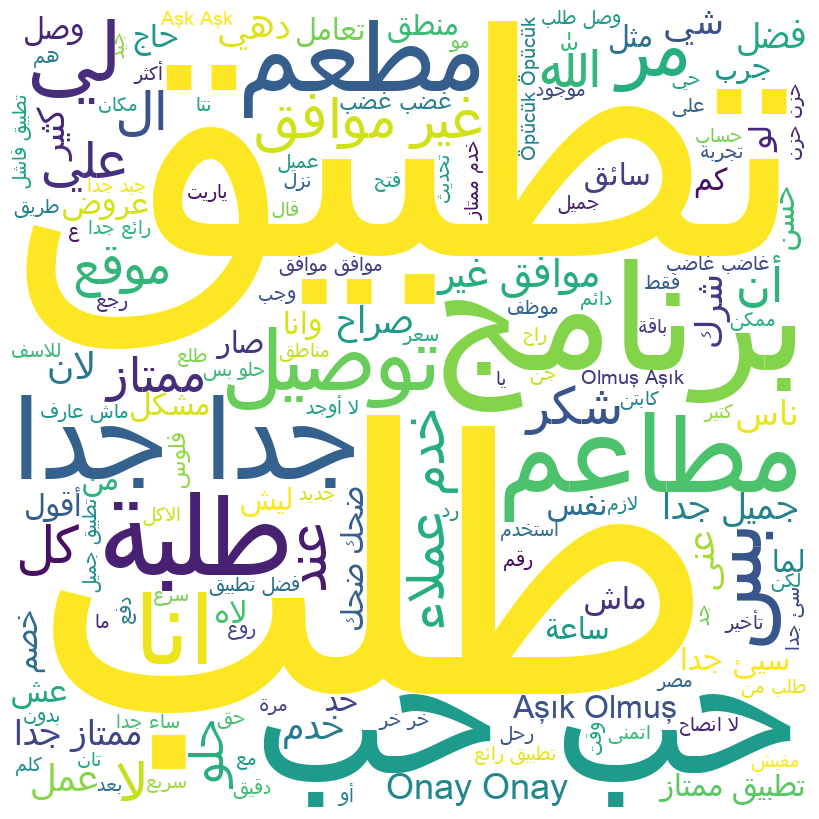

In [60]:
from wordcloud import WordCloud
# Generate the word cloud using an Arabic font
wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='white',
    stopwords = all_stopwords,
    min_font_size = 10,
    font_path=r'C:\Users\Tameem\Arial Unicode MS Regular.ttf'  # Specify the path to an Arabic font
).generate(reshaped_arabic_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [83]:
from scipy.sparse import hstack
import numpy as np
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and it has a 'language' column to distinguish between Turkish and Arabic
turkish_texts = df[df['language'] == 'Turkish']['review_description']
arabic_texts = df[df['language'] == 'Arabic']['review_description']

# Vectorize Turkish texts
turkish_vectorizer = TfidfVectorizer()
turkish_features = turkish_vectorizer.fit_transform(turkish_texts)

# Optionally, vectorize Arabic texts
arabic_vectorizer = TfidfVectorizer(max_features=10000)
arabic_features = arabic_vectorizer.fit_transform(arabic_texts)

# Now, 'turkish_features' contains the TF-IDF features for Turkish texts,
# and 'arabic_features' contains the TF-IDF features for Arabic texts.


# for Turkish and Arabic texts respectively
turkish_feature_names = turkish_vectorizer.get_feature_names_out()
arabic_feature_names = arabic_vectorizer.get_feature_names_out()


In [65]:
def label_to_num(label):
    return {'negative': -1, 'neutral': 0, 'positive': 1}[label]

df['rating'] = df['rating'].apply(label_to_num)  # Convert string labels to numerical values

In [66]:
# remap the class labels in the ‚Äòrating‚Äô column of the DataFrame, it maps -1 to 0, 0 to 1, and 1 to 2
def mappingclasses(classx):
    return {-1:0,0:1,1:2}[classx]
df['rating']=df['rating'].apply(lambda x:mappingclasses(x))



In [84]:
# Create a DataFrame with the feature names as columns
X1 = pd.DataFrame(arabic_features.toarray(),columns=arabic_feature_names)
X2= pd.DataFrame(turkish_features.toarray(),columns=turkish_feature_names)

In [85]:
Y=df.rating

In [86]:
from sklearn.model_selection import train_test_split
# Assuming 'df' has a 'rating' column with labels and a 'language' column to distinguish languages
arabic_labels = df[df['language'] == 'Arabic']['rating']
turkish_labels = df[df['language'] == 'Turkish']['rating']

# Split the Arabic data
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, arabic_labels, random_state=42, test_size=0.20, shuffle=True)

# Split the Turkish data
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, turkish_labels, random_state=42, test_size=0.20, shuffle=True)


# **Modelling**

In [73]:
import numpy as np
from sklearn import metrics
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report , roc_curve, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score,make_scorer,mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV


def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))

    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print("                      Traing Classification Report                      ")
    print(classification_report(y_train,  trained_model.predict(x_train)))
    print("                      Testing Classification Report                      ")
    print(classification_report(y_test,  trained_model.predict(x_test)))

# **Random Forrest**

Testing accuracy   : 81.88772025679552 %
Training accuracy  : 98.42901540247942 %
precision :  0.8188772025679552
recall    :  0.8188772025679552
f1_score  :  0.8188772025679552


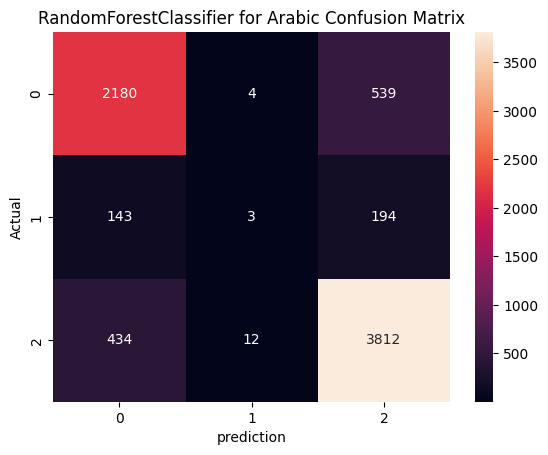

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     10863
           1       1.00      0.94      0.97      1478
           2       0.98      1.00      0.99     16940

    accuracy                           0.98     29281
   macro avg       0.99      0.97      0.98     29281
weighted avg       0.98      0.98      0.98     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2723
           1       0.16      0.01      0.02       340
           2       0.84      0.90      0.87      4258

    accuracy                           0.82      7321
   macro avg       0.60      0.57      0.56      7321
weighted avg       0.79      0.82      0.80      7321



In [94]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
trained_clf_random_forest1 = RandomForestClassifier().fit(x1_train, y1_train)
get_accuracy('RandomForestClassifier for Arabic',trained_clf_random_forest1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 80.64516129032258 %
Training accuracy  : 100.0 %
precision :  0.8064516129032258
recall    :  0.8064516129032258
f1_score  :  0.8064516129032258


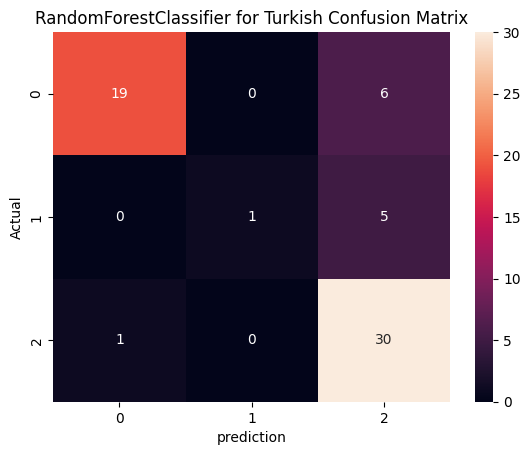

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00       127

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       1.00      0.17      0.29         6
           2       0.73      0.97      0.83        31

    accuracy                           0.81        62
   macro avg       0.89      0.63      0.65        62
weighted avg       0.85      0.81      0.78        62



In [87]:
trained_clf_random_forest2 = RandomForestClassifier().fit(x2_train, y2_train)
get_accuracy('RandomForestClassifier for Turkish',trained_clf_random_forest2,x2_train, y2_train, x2_test, y2_test)

# **Naive Bayes**

Testing accuracy   : 82.36579702226472 %
Training accuracy  : 85.20542331204535 %
precision :  0.8236579702226472
recall    :  0.8236579702226472
f1_score  :  0.8236579702226472


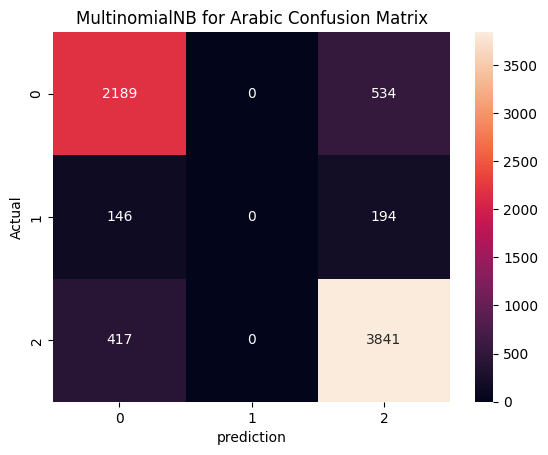

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     10863
           1       1.00      0.00      0.00      1478
           2       0.86      0.93      0.89     16940

    accuracy                           0.85     29281
   macro avg       0.90      0.59      0.58     29281
weighted avg       0.86      0.85      0.83     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2723
           1       0.00      0.00      0.00       340
           2       0.84      0.90      0.87      4258

    accuracy                           0.82      7321
   macro avg       0.55      0.57      0.56      7321
weighted avg       0.78      0.82      0.80      7321



C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [88]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_multinomial_nb1 = MultinomialNB().fit(x1_train, y1_train)
get_accuracy('MultinomialNB for Arabic',trained_clf_multinomial_nb1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 82.25806451612904 %
Training accuracy  : 91.05691056910568 %
precision :  0.8225806451612904
recall    :  0.8225806451612904
f1_score  :  0.8225806451612904


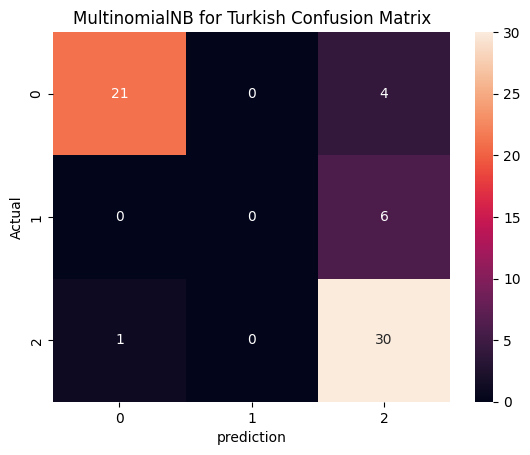

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        97
           1       0.00      0.00      0.00        22
           2       0.89      1.00      0.94       127

    accuracy                           0.91       246
   macro avg       0.61      0.67      0.64       246
weighted avg       0.83      0.91      0.87       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.00      0.00      0.00         6
           2       0.75      0.97      0.85        31

    accuracy                           0.82        62
   macro avg       0.57      0.60      0.58        62
weighted avg       0.76      0.82      0.78        62



C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [89]:
trained_clf_multinomial_nb2 = MultinomialNB().fit(x2_train, y2_train)
get_accuracy('MultinomialNB for Turkish',trained_clf_multinomial_nb2,x2_train, y2_train, x2_test, y2_test)

# **Linear SVC**

C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Testing accuracy   : 81.95601693757683 %
Training accuracy  : 90.20866773675762 %
precision :  0.8195601693757684
recall    :  0.8195601693757684
f1_score  :  0.8195601693757684


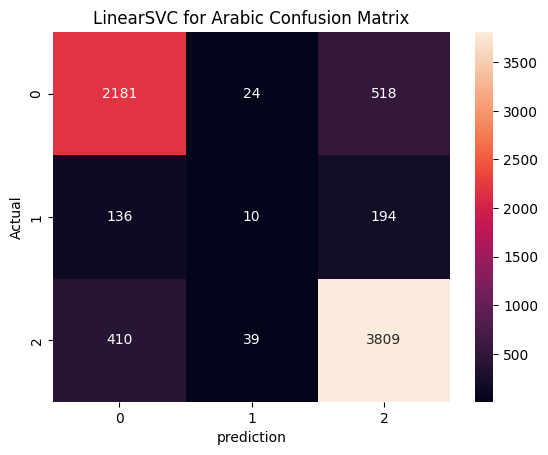

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10863
           1       0.93      0.30      0.45      1478
           2       0.90      0.96      0.93     16940

    accuracy                           0.90     29281
   macro avg       0.91      0.72      0.76     29281
weighted avg       0.90      0.90      0.89     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2723
           1       0.14      0.03      0.05       340
           2       0.84      0.89      0.87      4258

    accuracy                           0.82      7321
   macro avg       0.59      0.57      0.57      7321
weighted avg       0.79      0.82      0.80      7321



In [90]:
from sklearn.svm import LinearSVC
trained_clf_svc1 = LinearSVC().fit(x1_train, y1_train)
get_accuracy('LinearSVC for Arabic',trained_clf_svc1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 83.87096774193549 %
Training accuracy  : 100.0 %
precision :  0.8387096774193549
recall    :  0.8387096774193549
f1_score  :  0.8387096774193549


C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


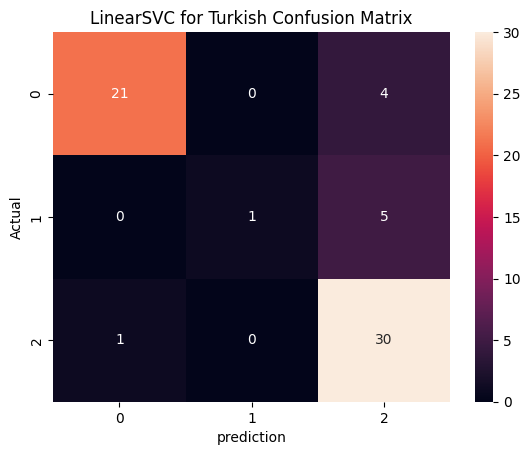

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00       127

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       1.00      0.17      0.29         6
           2       0.77      0.97      0.86        31

    accuracy                           0.84        62
   macro avg       0.91      0.66      0.68        62
weighted avg       0.87      0.84      0.82        62



In [91]:
trained_clf_svc2 = LinearSVC().fit(x2_train, y2_train)
get_accuracy('LinearSVC for Turkish',trained_clf_svc2,x2_train, y2_train, x2_test, y2_test)

# **Logistic Regression**

Testing accuracy   : 83.00778582160908 %
Training accuracy  : 86.9915644957481 %
precision :  0.8300778582160907
recall    :  0.8300778582160907
f1_score  :  0.8300778582160907


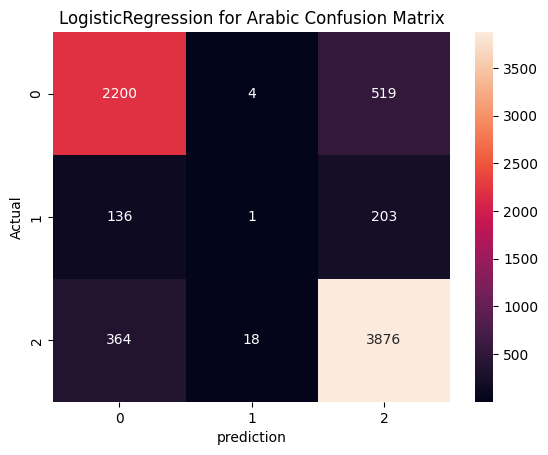

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     10863
           1       0.73      0.05      0.09      1478
           2       0.87      0.94      0.91     16940

    accuracy                           0.87     29281
   macro avg       0.82      0.62      0.62     29281
weighted avg       0.86      0.87      0.85     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2723
           1       0.04      0.00      0.01       340
           2       0.84      0.91      0.88      4258

    accuracy                           0.83      7321
   macro avg       0.57      0.57      0.56      7321
weighted avg       0.80      0.83      0.81      7321



In [92]:
from sklearn.linear_model import LogisticRegression
trained_clf_LogisticRegression1 = LogisticRegression().fit(x1_train, y1_train)
get_accuracy('LogisticRegression for Arabic',trained_clf_LogisticRegression1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 79.03225806451613 %
Training accuracy  : 91.869918699187 %
precision :  0.7903225806451613
recall    :  0.7903225806451613
f1_score  :  0.7903225806451613


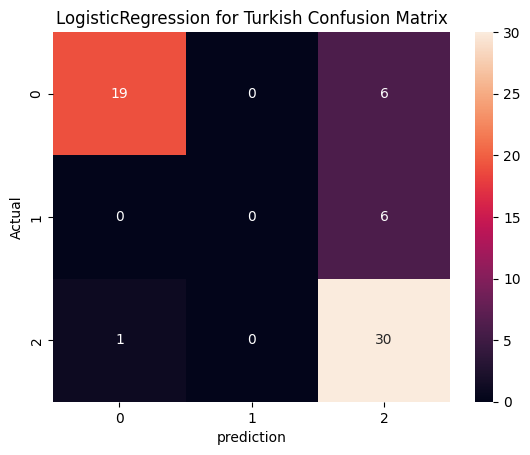

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        97
           1       1.00      0.09      0.17        22
           2       0.91      1.00      0.95       127

    accuracy                           0.92       246
   macro avg       0.95      0.70      0.69       246
weighted avg       0.93      0.92      0.89       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.00      0.00      0.00         6
           2       0.71      0.97      0.82        31

    accuracy                           0.79        62
   macro avg       0.55      0.58      0.56        62
weighted avg       0.74      0.79      0.75        62



C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [93]:
trained_clf_LogisticRegression2 = LogisticRegression().fit(x2_train, y2_train)
get_accuracy('LogisticRegression for Turkish',trained_clf_LogisticRegression2,x2_train, y2_train, x2_test, y2_test)

# **BERT**

In [116]:
import warnings

# Ignore user warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

#Load the Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)

C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [125]:
# Select all Turkish reviews
turkish_reviews = df[df['language'] == 'Turkish']

# Randomly select 20,000 Arabic reviews
arabic_reviews = df[df['language'] == 'Arabic'].sample(n=3000, random_state=42)

# Combine both Turkish and Arabic reviews into one DataFrame
selected_reviews = pd.concat([turkish_reviews, arabic_reviews])

# Assuming 'rating' is the name of the column with ratings
selected_ratings = df.loc[selected_reviews.index, 'rating']

xx_train, xx_test, yy_train, yy_test = train_test_split(selected_reviews['review_description'], selected_ratings, test_size=0.2, random_state=42)

In [126]:
# Tokenize the text
train_encodings = tokenizer(xx_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(xx_test.tolist(), truncation=True, padding=True, max_length=128)

In [127]:
# Convert to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    yy_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    yy_test
)).batch(16)

In [128]:
# Configure the Model for Training
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [129]:
import warnings

# Ignore user warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Train the Model
model.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3
166/166 [==============================] - 2042s 11s/step - loss: 0.6892 - accuracy: 0.6961 - val_loss: 0.5326 - val_accuracy: 0.8112
Epoch 2/3
166/166 [==============================] - 2032s 12s/step - loss: 0.6117 - accuracy: 0.7691 - val_loss: 0.5537 - val_accuracy: 0.7810
Epoch 3/3
166/166 [==============================] - 2011s 12s/step - loss: 0.4885 - accuracy: 0.8299 - val_loss: 0.5911 - val_accuracy: 0.7870


In [130]:
#Evaluate the model‚Äôs performance
model.evaluate(test_dataset)

42/42 [==============================] - 136s 3s/step - loss: 0.5911 - accuracy: 0.7870


[0.5911012291908264, 0.787009060382843]

# **Testing**

In [96]:
def returnCleanText(text):

    #Remove Punctuation
    text = re.sub(r'[^\w\s]', ' ', text)  # This will replace all punctuation with spaces
    text = re.sub(r'_', '', text)  # This will remove underscores if present
    text = text.replace('ÿõ',"", )

    #Remove StopWords
    text = " ".join([word for word in text.split() if word not in all_stopwords])

    # Transform emojis
    text = emojiTextTransform(text)

    #remove digits
    text = ''.join([word for word in text if not word.isdigit()])

    # lemmatize the reviews
    text = lemmer.lemmatize_text(text)
    text = " ".join(text)
    return text

testtext = returnCleanText("ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥ŸÅ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ° üíî Ÿàÿßÿ≥ÿπÿßÿ±ŸáŸÖ ÿßÿπŸÑŸâ ŸÖŸÜ ÿßÿ≥ÿπÿßÿ± ÿßŸÑŸÖÿ≠ŸÑÿßÿ™ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ∂ÿ±Ÿäÿ®ÿ© Ÿàÿ±ÿ≥ŸàŸÖ ÿßŸÑÿÆÿØŸÖÿ© ÿπ ÿßŸÑŸÅÿßÿ™Ÿàÿ±ÿ©")

id2label = {0:"Negative",1:"Neutral",2:"Postive"}

In [106]:
import re

def is_arabic(text):
    # A regular expression that matches Arabic script characters
    arabic_pattern = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF]')
    return arabic_pattern.search(text) is not None

def is_turkish(text):
    # A regular expression that matches common Turkish characters not found in English
    turkish_pattern = re.compile(r'[ƒü√º≈ü√∂√ßƒ∞ƒû√ú≈û√ñ√á]')
    return turkish_pattern.search(text) is not None

# Example usage
print(is_arabic("Ÿáÿ∞ÿß ŸÜÿµ ÿ®ÿßŸÑŸÑÿ∫ÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ©"))  # Should return True
print(is_turkish("Bu uygulama √ßok √ßok k√∂t√º"))  # Should return True

True
True


In [108]:
import warnings

# Ignore user warnings
warnings.filterwarnings('ignore', category=UserWarning)

def predict_sentiment(text, models, vectorizer, id2label):
    # Preprocess the text
    clean_text = returnCleanText(text)

    # Vectorize the text
    # Check the language of the text and use the appropriate vectorizer
    if is_arabic(clean_text):
      text_vector = arabic_vectorizer.transform([clean_text]).toarray()
       # Make predictions with each model
      predictions = {}
      for model_name, model in models_ar.items():
          predicted_label_num = model.predict(text_vector)[0]
          predicted_label = id2label[predicted_label_num]
          predictions[model_name] = predicted_label
    elif is_turkish(clean_text):
      text_vector = turkish_vectorizer.transform([clean_text]).toarray()
       # Make predictions with each model
      predictions = {}
      for model_name, model in models_tr.items():
          predicted_label_num = model.predict(text_vector)[0]
          predicted_label = id2label[predicted_label_num]
          predictions[model_name] = predicted_label
    else:
      raise ValueError("The language of the text is neither Arabic nor Turkish.")

    return predictions

# Dictionary of your trained models
models_ar = {
    'RandomForest': trained_clf_random_forest1,
    'MultinomialNB': trained_clf_multinomial_nb1,
    'LinearSVC': trained_clf_svc1,
    'LogisticRegression': trained_clf_LogisticRegression1,
}

models_tr = {
    'RandomForest': trained_clf_random_forest2,
    'MultinomialNB': trained_clf_multinomial_nb2,
    'LinearSVC': trained_clf_svc2,
    'LogisticRegression': trained_clf_LogisticRegression2,
}

# Example usage:
test_text_arabic1 = "ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥ŸÅ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ° üíî Ÿàÿßÿ≥ÿπÿßÿ±ŸáŸÖ ÿßÿπŸÑŸâ ŸÖŸÜ ÿßÿ≥ÿπÿßÿ± ÿßŸÑŸÖÿ≠ŸÑÿßÿ™ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ∂ÿ±Ÿäÿ®ÿ© Ÿàÿ±ÿ≥ŸàŸÖ ÿßŸÑÿÆÿØŸÖÿ© ÿπ ÿßŸÑŸÅÿßÿ™Ÿàÿ±ÿ©" # Unfortunately, the application has become bad üíî and their prices are higher than the prices of shops with the increase in tax and service fees on the bill." negative
test_text_arabic2 = "ÿßŸÑÿÆÿØŸÖÿ© ŸÉÿßŸÜÿ™ ÿ£ÿ®ÿ∑ÿ£ ŸÖŸÜ ÿßŸÑŸÖÿ™ŸàŸÇÿπ ŸàÿßŸÑŸÖŸàÿ∏ŸÅŸäŸÜ ÿ∫Ÿäÿ± ŸÖÿ™ÿπÿßŸàŸÜŸäŸÜ." # Service was slower expected and staff unhelpful. Negative
test_text_arabic3 = "ÿßŸÑÿπÿ±ÿ∂ ŸÉÿßŸÜ ŸÖÿ∞ŸáŸÑÿßŸã Ÿàÿ™ÿ¨ÿßŸàÿ≤ ŸÉŸÑ ÿßŸÑÿ™ŸàŸÇÿπÿßÿ™!" # The show was great and exceeded all expectations! positive
test_text_arabic4 = "ÿßŸÑŸÖŸÜÿ™ÿ¨ ŸàÿµŸÑ ŸÅŸä ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÖÿ≠ÿØÿØ ŸàŸÉÿßŸÜ ŸÖÿ∫ŸÑŸÅŸãÿß ÿ¨ŸäÿØŸãÿß." # The product arrived on time and was well packaged. neutral
test_text_turkish1 = "Bu uygulama √ßok √ßok k√∂t√º"  # This app is very very bad. Negative
test_text_turkish2 = "√úr√ºn zamanƒ±nda geldi ve iyi paketlenmi≈üti." # The product arrived on time and was well packaged. neutral
test_text_turkish3 = "Hizmet beklenenden daha yava≈ütƒ± ve √ßalƒ±≈üanlar yardƒ±mcƒ± olmadƒ±." # The service was slower than expected and the staff was not helpful. negative
test_text_turkish4 = "G√∂steri harikaydƒ± ve t√ºm beklentileri a≈ütƒ±!" # The show was great and exceeded all expectations! positive

# Predict sentiment for Arabic text
predictions_arabic1 = predict_sentiment(test_text_arabic1, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic1}\nPredictions: {predictions_arabic1}\n")

predictions_arabic2 = predict_sentiment(test_text_arabic2, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic2}\nPredictions: {predictions_arabic2}\n")

predictions_arabic3 = predict_sentiment(test_text_arabic3, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic3}\nPredictions: {predictions_arabic3}\n")

predictions_arabic4 = predict_sentiment(test_text_arabic4, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic4}\nPredictions: {predictions_arabic4}\n")

# Predict sentiment for Turkish text
predictions_turkish1 = predict_sentiment(test_text_turkish1, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish1}\nPredictions: {predictions_turkish1}\n")

predictions_turkish2 = predict_sentiment(test_text_turkish2, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish2}\nPredictions: {predictions_turkish2}\n")

predictions_turkish3 = predict_sentiment(test_text_turkish3, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish3}\nPredictions: {predictions_turkish3}\n")

predictions_turkish4 = predict_sentiment(test_text_turkish4, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish4}\nPredictions: {predictions_turkish4}\n")


Arabic Text: ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥ŸÅ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ° üíî Ÿàÿßÿ≥ÿπÿßÿ±ŸáŸÖ ÿßÿπŸÑŸâ ŸÖŸÜ ÿßÿ≥ÿπÿßÿ± ÿßŸÑŸÖÿ≠ŸÑÿßÿ™ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ∂ÿ±Ÿäÿ®ÿ© Ÿàÿ±ÿ≥ŸàŸÖ ÿßŸÑÿÆÿØŸÖÿ© ÿπ ÿßŸÑŸÅÿßÿ™Ÿàÿ±ÿ©
Predictions: {'RandomForest': 'Negative', 'MultinomialNB': 'Negative', 'LinearSVC': 'Negative', 'LogisticRegression': 'Negative'}

Arabic Text: ÿßŸÑÿÆÿØŸÖÿ© ŸÉÿßŸÜÿ™ ÿ£ÿ®ÿ∑ÿ£ ŸÖŸÜ ÿßŸÑŸÖÿ™ŸàŸÇÿπ ŸàÿßŸÑŸÖŸàÿ∏ŸÅŸäŸÜ ÿ∫Ÿäÿ± ŸÖÿ™ÿπÿßŸàŸÜŸäŸÜ.
Predictions: {'RandomForest': 'Negative', 'MultinomialNB': 'Negative', 'LinearSVC': 'Negative', 'LogisticRegression': 'Negative'}

Arabic Text: ÿßŸÑÿπÿ±ÿ∂ ŸÉÿßŸÜ ŸÖÿ∞ŸáŸÑÿßŸã Ÿàÿ™ÿ¨ÿßŸàÿ≤ ŸÉŸÑ ÿßŸÑÿ™ŸàŸÇÿπÿßÿ™!
Predictions: {'RandomForest': 'Postive', 'MultinomialNB': 'Postive', 'LinearSVC': 'Postive', 'LogisticRegression': 'Postive'}

Arabic Text: ÿßŸÑŸÖŸÜÿ™ÿ¨ ŸàÿµŸÑ ŸÅŸä ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÖÿ≠ÿØÿØ ŸàŸÉÿßŸÜ ŸÖÿ∫ŸÑŸÅŸãÿß ÿ¨ŸäÿØŸãÿß.
Predictions: {'RandomForest': 'Postive', 'MultinomialNB': 'Postive', 'LinearSVC': 'Postive', 'LogisticRegression': 'Postive'}

Turkish 

# **Testing BERT**

In [131]:
test1=["ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥ŸÅ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ° üíî Ÿàÿßÿ≥ÿπÿßÿ±ŸáŸÖ ÿßÿπŸÑŸâ ŸÖŸÜ ÿßÿ≥ÿπÿßÿ± ÿßŸÑŸÖÿ≠ŸÑÿßÿ™ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ∂ÿ±Ÿäÿ®ÿ© Ÿàÿ±ÿ≥ŸàŸÖ ÿßŸÑÿÆÿØŸÖÿ© ÿπ ÿßŸÑŸÅÿßÿ™Ÿàÿ±ÿ©"]
test1_data_encodings = tokenizer(test1, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test1_input_ids = tf.constant(test1_data_encodings['input_ids'])  # Convert input encodings to tensors
test1_attention_mask = tf.constant(test1_data_encodings['attention_mask'])

predictions1 = model.predict([test1_input_ids, test1_attention_mask])
predicted_labels1 = tf.argmax(predictions1.logits, axis=1)
predicted_labels1 = int(predicted_labels1[0])

predicted_labels1

predicted_rate = {0:"Negative",1:"Neutral",2:"Postive"}

print(f"The review is : {test1}\n The rate is {predicted_rate[predicted_labels1]}")

1/1 [==============================] - 21s 21s/step
The review is : ['ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥ŸÅ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ° üíî Ÿàÿßÿ≥ÿπÿßÿ±ŸáŸÖ ÿßÿπŸÑŸâ ŸÖŸÜ ÿßÿ≥ÿπÿßÿ± ÿßŸÑŸÖÿ≠ŸÑÿßÿ™ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ∂ÿ±Ÿäÿ®ÿ© Ÿàÿ±ÿ≥ŸàŸÖ ÿßŸÑÿÆÿØŸÖÿ© ÿπ ÿßŸÑŸÅÿßÿ™Ÿàÿ±ÿ©']
 The rate is Negative


In [132]:
test2=["ÿµŸÑÿ≠Ÿàÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿØŸá ÿ®ŸÇŸâüò°"]
test2_data_encodings = tokenizer(test2, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test2_input_ids = tf.constant(test2_data_encodings['input_ids'])  # Convert input encodings to tensors
test2_attention_mask = tf.constant(test2_data_encodings['attention_mask'])

predictions2 = model.predict([test2_input_ids, test2_attention_mask])
predicted_labels2 = tf.argmax(predictions2.logits, axis=1)
predicted_labels2 = int(predicted_labels2[0])

predicted_labels2

print(f"The review is : {test2}\n The rate is {predicted_rate[predicted_labels2]}")

1/1 [==============================] - 0s 122ms/step
The review is : ['ÿµŸÑÿ≠Ÿàÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿØŸá ÿ®ŸÇŸâüò°']
 The rate is Negative


In [133]:
test3=["ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ¨ÿßŸÖÿØ ÿßŸàŸä ÿßŸÜÿß ÿßŸÜÿ®Ÿáÿ±ÿ™"]
test3_data_encodings = tokenizer(test3, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test3_input_ids = tf.constant(test3_data_encodings['input_ids'])  # Convert input encodings to tensors
test3_attention_mask = tf.constant(test3_data_encodings['attention_mask'])

predictions3 = model.predict([test3_input_ids, test3_attention_mask])
predicted_labels3 = tf.argmax(predictions3.logits, axis=1)
predicted_labels3 = int(predicted_labels3[0])

predicted_labels3

print(f"The review is : {test3}\n The rate is {predicted_rate[predicted_labels3]}")

1/1 [==============================] - 0s 101ms/step
The review is : ['ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ¨ÿßŸÖÿØ ÿßŸàŸä ÿßŸÜÿß ÿßŸÜÿ®Ÿáÿ±ÿ™']
 The rate is Postive


In [139]:
test4=[" ÿ™Ÿä ÿÆÿ≤Ÿä ŸÖŸÜÿ™ÿ¨ÿßÿ™ ÿ≥Ÿäÿ¶ÿ© ŸÖÿ¥ ÿµÿßŸäÿ± ŸÖŸÜŸáŸÜ ÿ®ŸÉŸÑ"]
test4_data_encodings = tokenizer(test4, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test4_input_ids = tf.constant(test4_data_encodings['input_ids'])  # Convert input encodings to tensors
test4_attention_mask = tf.constant(test4_data_encodings['attention_mask'])

predictions4 = model.predict([test4_input_ids, test4_attention_mask])
predicted_labels4 = tf.argmax(predictions4.logits, axis=1)
predicted_labels4 = int(predicted_labels4[0])

predicted_labels4

print(f"The review is : {test4}\n The rate is {predicted_rate[predicted_labels4]}")

1/1 [==============================] - 0s 99ms/step
The review is : [' ÿ™Ÿä ÿÆÿ≤Ÿä ŸÖŸÜÿ™ÿ¨ÿßÿ™ ÿ≥Ÿäÿ¶ÿ© ŸÖÿ¥ ÿµÿßŸäÿ± ŸÖŸÜŸáŸÜ ÿ®ŸÉŸÑ']
 The rate is Negative


In [135]:
test5=["√úr√ºn zamanƒ±nda geldi ve iyi paketlenmi≈üti."]
test5_data_encodings = tokenizer(test5, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test5_input_ids = tf.constant(test5_data_encodings['input_ids'])  # Convert input encodings to tensors
test5_attention_mask = tf.constant(test5_data_encodings['attention_mask'])

predictions5 = model.predict([test5_input_ids, test5_attention_mask])
predicted_labels5 = tf.argmax(predictions5.logits, axis=1)
predicted_labels5 = int(predicted_labels5[0])

predicted_labels5

print(f"The review is : {test5}\n The rate is {predicted_rate[predicted_labels5]}")

1/1 [==============================] - 0s 101ms/step
The review is : ['√úr√ºn zamanƒ±nda geldi ve iyi paketlenmi≈üti.']
 The rate is Postive


In [136]:
test6=["Hizmet beklenenden daha yava≈ütƒ± ve √ßalƒ±≈üanlar yardƒ±mcƒ± olmadƒ±."]
test6_data_encodings = tokenizer(test6, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test6_input_ids = tf.constant(test6_data_encodings['input_ids'])  # Convert input encodings to tensors
test6_attention_mask = tf.constant(test6_data_encodings['attention_mask'])

predictions6 = model.predict([test6_input_ids, test6_attention_mask])
predicted_labels6 = tf.argmax(predictions6.logits, axis=1)
predicted_labels6 = int(predicted_labels6[0])

predicted_labels6

print(f"The review is : {test6}\n The rate is {predicted_rate[predicted_labels6]}")

1/1 [==============================] - 0s 111ms/step
The review is : ['Hizmet beklenenden daha yava≈ütƒ± ve √ßalƒ±≈üanlar yardƒ±mcƒ± olmadƒ±.']
 The rate is Negative
